# Anomaly detection algorithms

Unsupervised anomaly detection algorithms can detect data that does not belong to normal data patterns. In general, it looks for isolated samples, samples that are in low-density regions. Anomaly detection algorithms can be divided into several approaches such as:

-	Density based 
-	Distance based 
-   Kernel based
-	Statistical approaches
-	Tree-based methods 

In this notebook we test a few of these algorithms. The Local Outlier Factor, robust covariance, One Class Support Vector Machine, Isolation Forest is a tree-based.


**Local Outlier Factor** LOF compares the density of any given data point to the density of its neighbors. Since outliers come from low-density areas, the ratio will be higher for anomalous data points. As a rule of thumb, a normal data point has a LOF between 1 and 1.5 whereas anomalous observations will have much higher LOF. The higher the LOF the more likely it is an outlier (2).
Density-based methods identify anomalies based on the local density of data points. Anomalies are detected as points that have significantly lower density compared to their neighboring points. Another example next to LOF is  DBSCAN.

**Distance-based** methods determine anomalies by measuring the distance or dissimilarity of data points to their neighboring points. Points that are significantly distant or dissimilar from others are considered anomalies. Examples include k-nearest neighbors (k-NN), distance-based outlier detection (e.g., using Mahalanobis distance or Euclidean distance), and angle-based outlier detection. k-NN is the foundation of LOF. in some aspect, one can infers that density base and distance base methods are similar to each other or used as the foundation of each other the reason is that the density is not something more than the number of datapoints in a surface area; consequently, density and distance between datapoints have countradictory relationship in a way that if the distance between points increases the density of the dataset in that local area decreases and vica versa.

The **robust covariance** method is a **gaussian elipse-based method**. If it is outside the gaussian curve, or on the edges it might be an outlier. It is based on the Mahalanobis distance which assesses how many standard deviations σ away xᵢ is from μ. An extreme observation has a large distance from the center of a distribution. An envelope around the data set can be constructed by choosing a critical value of the Mahalanobis distance. Points outside this envelope are considered anomalies/outliers. (1)

**One Class Support Vector Machine** is cluster method based on the Support Vector Machine algorithm. Instead of separating classes into clusters, it separates one class from the origin. The points outside the boundary line are classified as outliers. It uses kernels. The default kernel is ‘rbf’ since most of the time the boundary is not linear. (3)

**Isolation Forest is a tree-based** method. The Isolation Forest algorithm does not explicitly consider density or neighborhood relationships between data points. Instead, it uses the idea that anomalies can be identified more quickly and easily in the tree structure compared to normal data points. Anomalies are expected to have shorter paths in the tree, as they require fewer splits to be isolated. It uses partitioning to make isolated trees, with the goal that each point is isolated. The more partitioning is needed, the more chance a data point is a regular point. An outlier is much easier to isolate than a regular point.  (4)

After a couple days of study, now I can realize that the Anomaly detection techniques are used here to find the outliers, then using them to train a model to predict other relevant outliers that may hapen in the future.

one way that one can use to find the best Anomaly Detection method is by using Cross Validation technique. I will explain this technique fully during studying this study case.

[1] Nascimento et all. "A cluster-based algorithm for anomaly detection in time series using Mahalanobis distance." Proceedings on the International Conference on Artificial Intelligence (ICAI). The Steering Committee of The World Congress in Computer Science, Computer Engineering and Applied Computing (WorldComp), 2015. 

[2] Alghushairy, Omar, et al. "A review of local outlier factor algorithms for outlier detection in big data streams." Big Data and Cognitive Computing 5.1 (2020): 1.

[3] Schölkopf, Bernhard, et al. "Support vector method for novelty detection." Advances in neural information processing systems 12 (1999).

[4] Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. "Isolation-based anomaly detection." ACM Transactions on Knowledge Discovery from Data (TKDD) 6.1 (2012): 1-39.

# Important concepts
### Feature Engineering
In various scenarios, redundant sources of information can hold varying degrees of importance. While they may provide crucial insights in some cases, they can be considered mere noise in others. A substantial amount of redundant data can arise from extensive simulations or independent measurements of the same system. Feature engineering techniques possess a unique capability to address this redundancy, ensuring computational efficiency and improved problem tractability.

https://en.wikipedia.org/wiki/Feature_engineering   

# Hypothesis

Anomaly detection techniques are commonly employed in predictive maintenance strategies to identify abnormal patterns or behaviors in machine data that may indicate impending failures.

By monitoring various sensor readings, operational parameters, or other relevant data from machines, anomaly detection algorithms can learn the normal behavior or expected patterns of the machines during their normal operation. When a deviation from the normal behavior is detected, it may indicate a potential failure or malfunction. The hypothesis is that the sensor readings of a pump will generate not normal values in case of an (upcoming) failure, and these can be determined with anomaly detection. Several algorithms will be used to evaluate the hypothesis 

datasource: https://en.wikipedia.org/wiki/Feature_engineering



## Assignment

Choose at least 1 out of the listed assignments

- Analyze the end result plot to evaluate the algorithm's performance. Look for anomalies identified by the algorithm and compare them to known anomalies or instances of abnormal behavior in the data. Assess whether the algorithm successfully captures these anomalies and if it shows promising results in detecting abnormal patterns. Based on the plot analysis, provide argumentation for the validity of the anomaly detection algorithm hypothesis (see above). Discuss how the algorithm effectively captures anomalies in the time series data and why it is a suitable approach for the use case. Support your argument with references to relevant literature that discuss the effectiveness of the chosen algorithm or similar algorithms in detecting anomalies in time series data.

- To improve data quality for anomaly detection in time series data, we can focus on removing outliers due to sensor reading errors while preserving anomalies. Additionally, performing resampling or aggregation can help reduce noise and highlight higher-level patterns relevant for anomaly detection. Find common steps to improve data quality for this particular use and implement those. Evaluate the performance of the algorithms compare to the original notebook. 

- Try another algorithm that has not been tested in the notebook. Provide argumentation for the validity of the anomaly detection algorithm you choose. 
- Try to find the best configuration for one of the tested algorithms
- Try anomaly detection on a different dataset without timeseries data. Evaluate the outcome


In [2]:
# import the general libraries
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

## The data
I will make some changes here to read the data properly. I will use a configue file for this aim.

In [3]:
#inspired by https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

def configReader():
    """
    explanation: This function open config,yaml file 
    and fetch the gonfigue file information
    input: ...
    output: configue file
    """
    with open("config.yaml", "r") as inputFile:
        config = yaml.safe_load(inputFile)
    return config

In [4]:
def dataframe_maker(config):
    file_directory, file_name = config.values()
    os.chdir(file_directory)
    df = pd.read_csv(file_name).drop('Unnamed: 0', axis=1)
    return df
df = dataframe_maker(configReader())
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
# make a copy of the dataset
df_origin = df.copy()

## Inspect data
This component holds significant importance in every machine learning process as it provides data scientists with valuable insights into a dataset. In this particular case study, in addition to the employed inspection methods, I will incorporate additional techniques to enhance my understanding of the dataset.

In [6]:
def data_inspector(df):

    # find the shape of data
    print(f'dataset has {df.shape[0]} observations, and {df.shape[1]} variables\n')

    # finding the information of this dataset
    print(f'{df.info()}\n')

    # extract the list of null values for columns (mostly sensors)
    null_values = df.isnull().sum(axis=0)
    print(f'number of null values for each columns\n{null_values}\n')
    print(f'maximum number of null values belong to {null_values.idxmax()} with {null_values.max()}\n')
    print(f'minimum number of null values belong to {null_values.idxmin()} with {null_values.min()}\n')
    
    # find the number of null values in the Broken points
    status_df = pd.DataFrame(df.groupby('machine_status'))
    broken_null_values = status_df[1][0].isnull().sum(axis=0)
    print(f'the number of Broken null data is as follows\n{broken_null_values}')

    # investigate null values based on percentages
    percentage_missing = df.isnull().sum().sort_values(ascending=False)/len(df)*100
    print(f'classified the maximum number of null values based on percentage\n')
    print(f'{percentage_missing.head()}\n') # show 5 largest missing 
    
    # find the number of members for each group in machine_status column
    print(f'number of members for each category in machine_status\n')
    print(f'{df.machine_status.value_counts()}\n')

In [7]:
data_inspector(df)

dataset has 220320 observations, and 54 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  senso

For finding the complete set of inspecting information please click on text editor. Machine_status column is a quite important column since one can find about the status of the pomp, the number of breaks and recovery duration by take a look at this column. Based on this information this pomp was broken seven times, 14477 hrs was in the recovery time, and work normally in the rest of this duration.

Regarding the quality of the dataset, there are two columns that show a great number of null values (sensor-15, and sensor-50); consequently, in order to not let these low quality data affects the whole dataset and the subsequent analysis one can erase them from the dataset.

To get more familiar with this dataset, based on this <a href = 'https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering'> link</a>, one can sketch all the sensors' plots as follows. This approach can enhance our comprehension of sensor functionality and even provide insights into the pump's operation.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

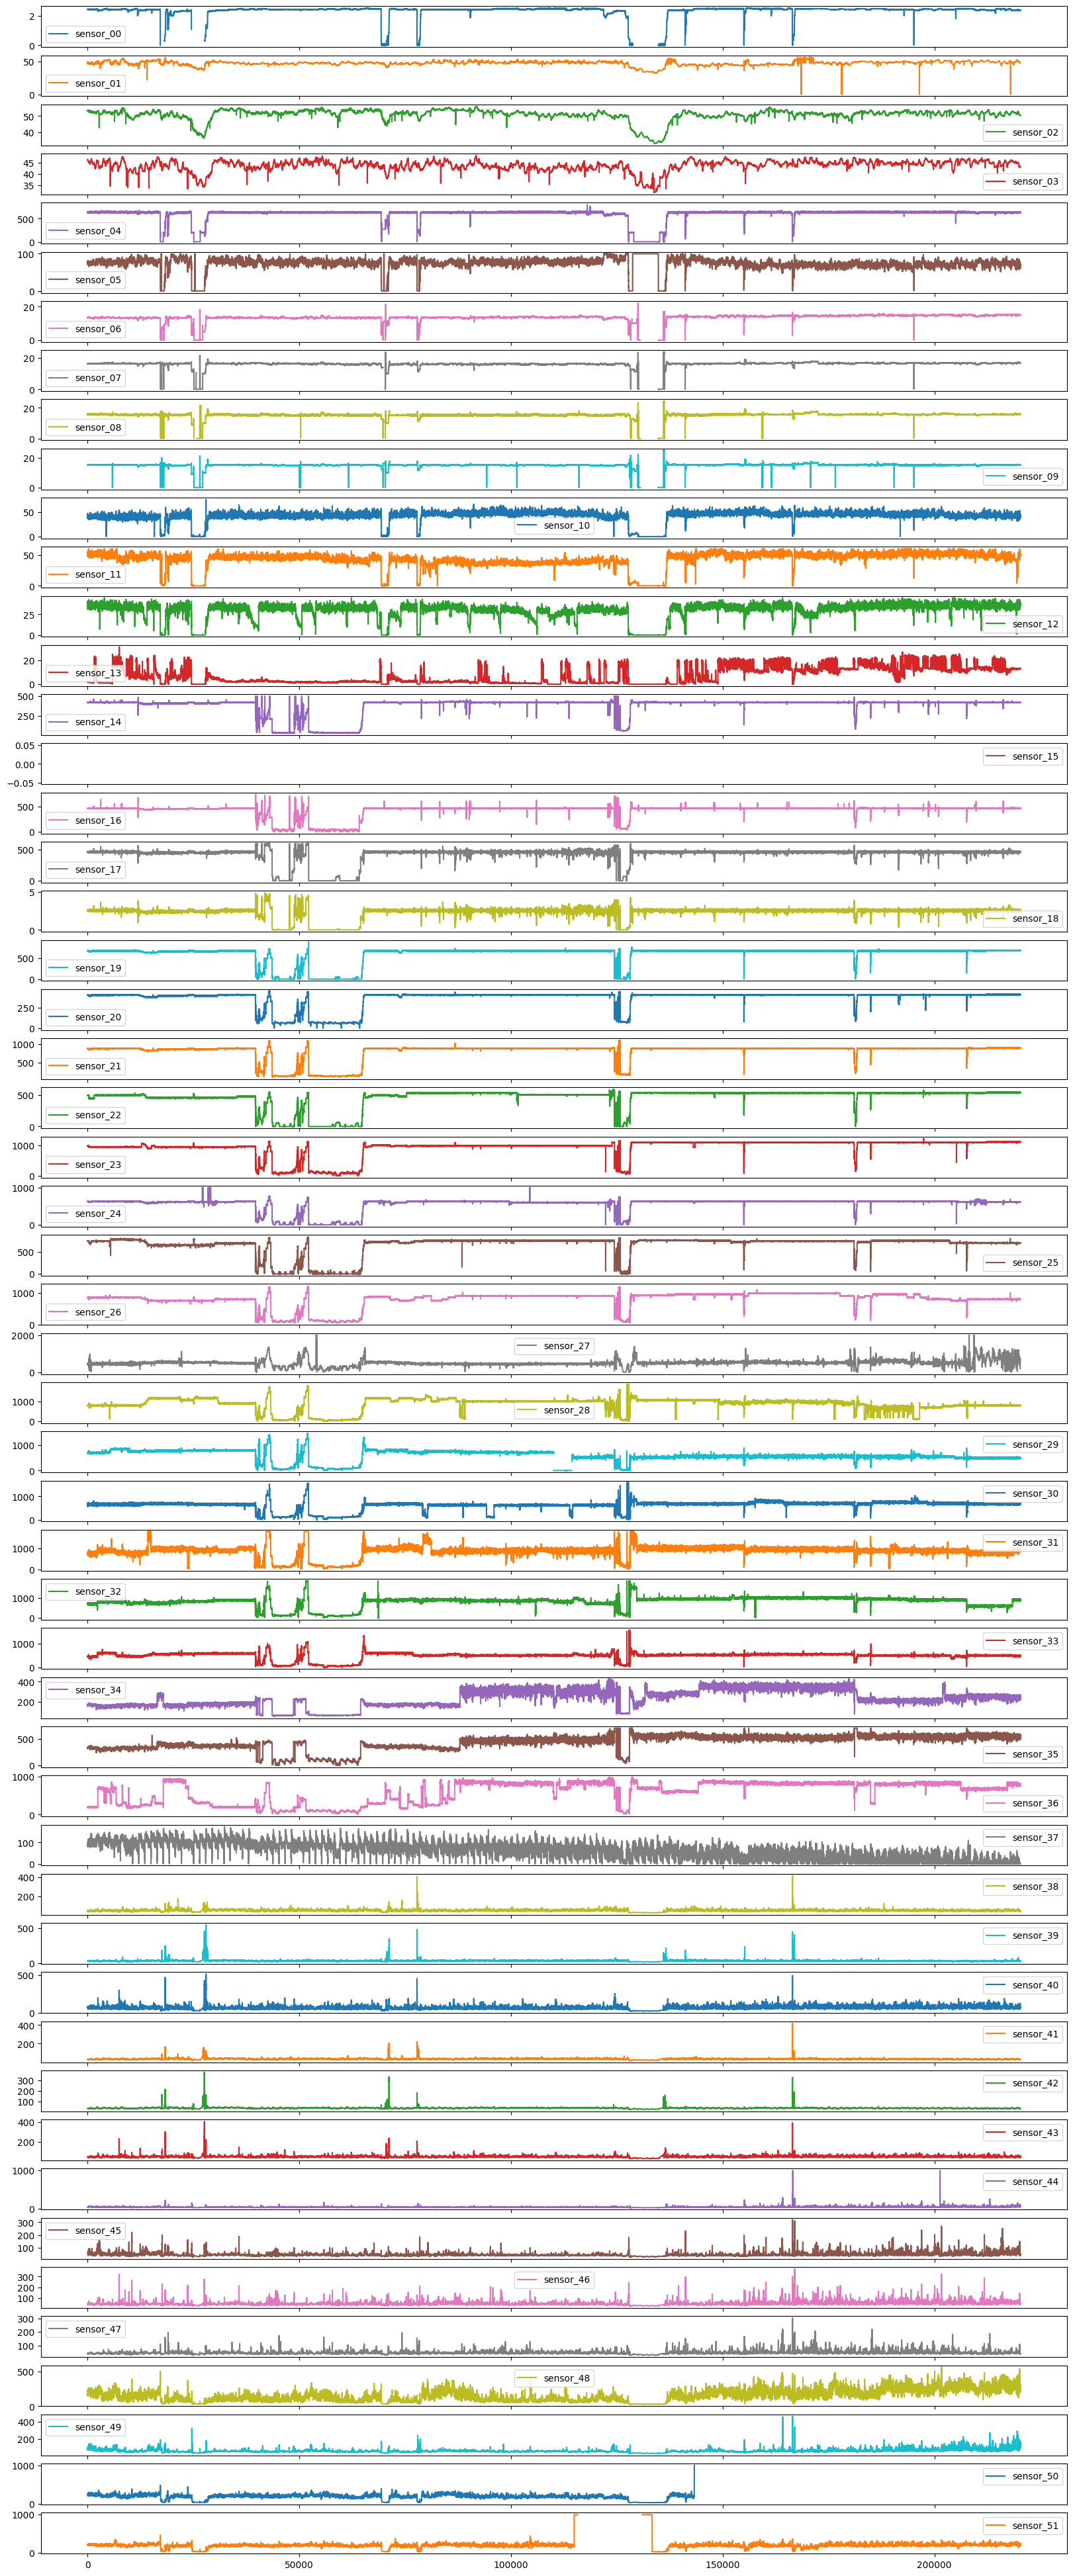

In [8]:
# time series plots for sensor data
df.plot(subplots =True, sharex = True, figsize = (20,50))

The plots offer valuable insights and additional observations. Firstly, as mentioned during the data inspection phase, it is evident that sensor-15 and sensor-50 have a significant number of missing values. In fact, sensor-15 lacks any data points entirely, while sensor-50 has no information available for approximately one-third of the period. Furthermore, certain sensors exhibit a minor amount of missing data, which can be addressed using various machine learning techniques. Additionally, some sensors display notable noise levels. For instance, sensor-37 is entirely noisy, with its data corrupted to the extent that no discernible trend in pump functionality can be detected. Although several other sensors, such as 5, 13, 34, 46, and 48, also exhibit significant noise, they still manage to capture the underlying trend. Finally, based on their behavior, the sensors can be categorized into distinct groups, with sensors within each group behaving similarly but differently from sensors in other groups. Identifying the cause behind these patterns is essential, as it may indicate varying functionalities or potential malfunctions. Analyzing these sensors would require different approaches depending on the specific situation. Now with this insight, one can begun preprocessing part.

# Preprocessing
Based on the above information one can immidiately find that snesor-15 with 100% missing data, and sensor-50 with about 34% should be removed to preserve the quality of the dataset. Also, one can change the type of timestamp column into datetime and set it an the index of the dataset.

In [9]:
# drop low quality columns
df.drop(['sensor_15', 'sensor_50'],inplace = True,axis=1)
# set timestamp to date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

Furthermore, it is worth evaluating the data quality of sensor-51, considering that it has more than five percent missing values. To accomplish this, one can utilize the machine status technique described in the <a href = 'https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering'> link</a>. Additionally, creating a machine status plot for sensor-00 would be highly informative since it represents the fourth highest proportion of missing values. Comparing this plot with that of sensor-51 can provide valuable insights.

In [11]:
# This visualization inspired from JANANI KARIYAWASAM found at 
# https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering

broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']

def plot_sensor(sensor):
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering')
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14, label = 'broken')
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

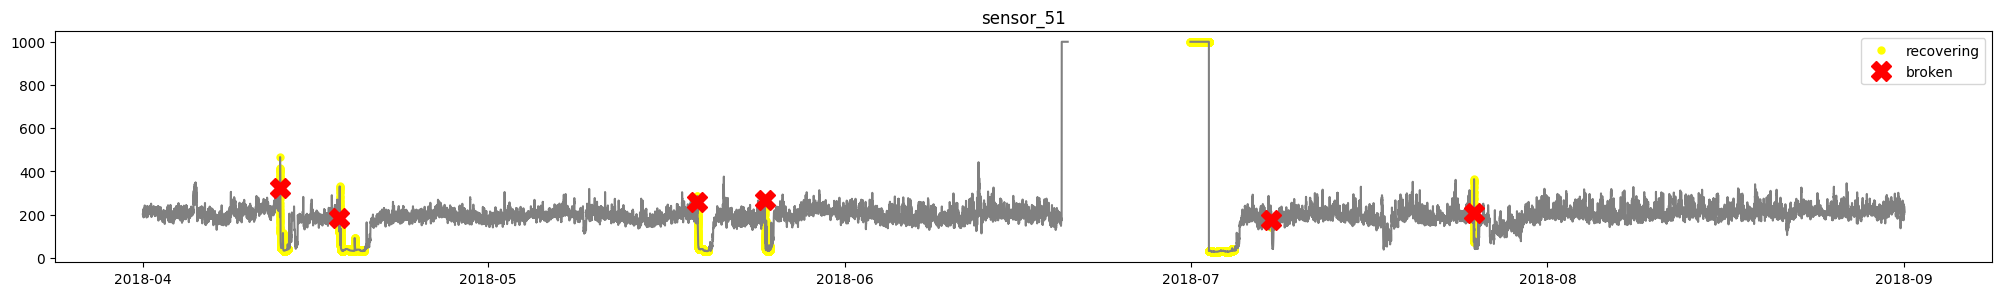

In [12]:
# plot sensor 51
plot_sensor('sensor_51')

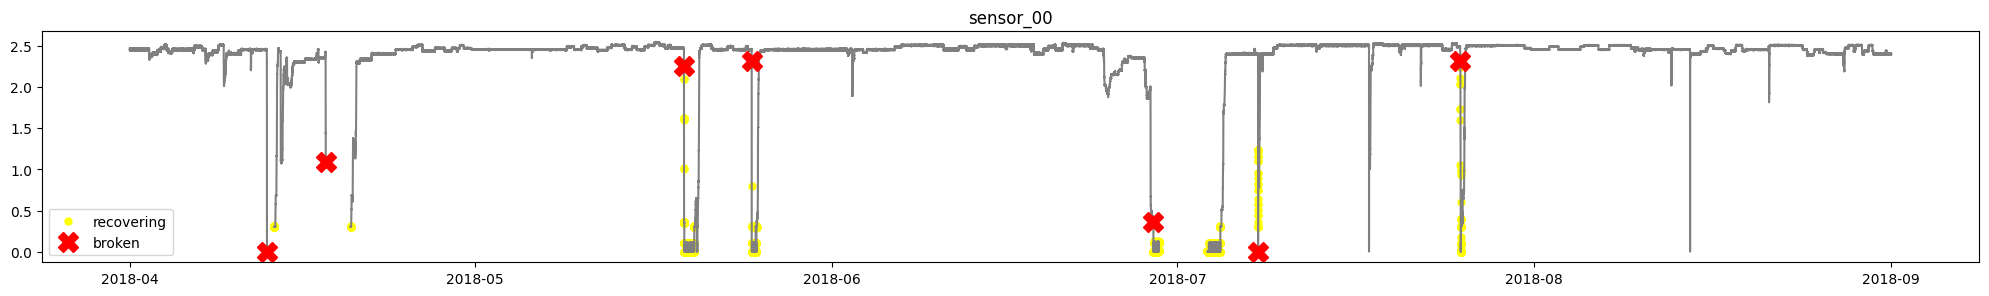

In [13]:
plot_sensor('sensor_00')

The key distinction between these two plots lies not only in the increased noise level of sensor-51 and the varying patterns but also in the absence of a particular broken point in sensor-51. Given that this study focuses on identifying broken points, this missing data can significantly impact the overall model outcome. Consequently, there are two potential approaches to address this issue. Also, one can evaluate the number of missing values in each category with and without sensor-51 since this column contains more than 15 thousand missing data.  To find this, one can use machine status plot for all the sensor or just use an inspecting technique to sum over all the missing data in each section. Here I will use the later approach.

In [14]:
def null_in_status(df):
    status_df = pd.DataFrame(df.groupby('machine_status'))

    for number in range(len(status_df[0])):
        null_number = status_df.iloc[number, 1].isnull().sum().sum()
        print(f'the number of missing values for {status_df.iloc[number, 0]} category is {null_number}')

null_in_status(df)

the number of missing values for BROKEN category is 1
the number of missing values for NORMAL category is 14019
the number of missing values for RECOVERING category is 33217


In [15]:
sensor_51 = df[['sensor_51', 'machine_status']]
null_in_status(sensor_51)

the number of missing values for BROKEN category is 1
the number of missing values for NORMAL category is 12384
the number of missing values for RECOVERING category is 2998


It can be infer that about 88% of missing values in NORMAL category is in the sensor-51 data. So, if one remove this column from the dataset the proportion of the missing values in Recovering category increases from about 70% to about 95%. This will allow us to use imputation methods that most align more with the RECOVERING category, and at the end, it will give us a a higher quality model.

In [16]:
df.drop('sensor_51',inplace = True,axis=1)
null_in_status(df)

the number of missing values for BROKEN category is 0
the number of missing values for NORMAL category is 1635
the number of missing values for RECOVERING category is 30219


In [17]:
broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']

 ### Imputation techniques
Base on this <a href = 'https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering'> link</a>, some basic imputation techniques can be 

    zero imputation
    mean imputation
    forward or backward fill imputation

While The technique that has been used in this study to impute the missing values is mean imputaion, it may not the best one in this context. The reason is that after removing sensor_51 data the majority of missing values (about 95%) belong to RECOVERING category, and the difference between these data points and the Normal ones is that they drastically deviate from the mean value of each sensor's dataset. Also, by implementing mean imputation we may unwantedly remove many anomaly points from the dataset; thus, mean imputation cannot be a good representative of the propbable values of the missing values. Moreover, zero imputation can be a good representative for some sensor datasets since their value in RECOVERING category is roughly zero; however, zero cannot be a good repesentative for all the other sensors that have RECOVERING values more than zero since zero may acts as an extrme value (outlier) in these datasets and corrupt the outcomming model. Furthermore, still 5% of the missing data belongs to NORMAL category, so by replacing zero with this values, we may create new anomalies or ourlier in the dataset.Consequently, the best method that one can use in this specific case can be forward or backward fill, and I will choose backward fill in this study.

Also on can click on the following links to get familiar with more imputation methods:

https://www.kaggle.com/code/juejuewang/handle-missing-values-in-time-series-for-beginners/report

https://datascience.stackexchange.com/questions/57776/explain-forward-filling-and-backward-filling-data-filling

https://www.kaggle.com/code/dansbecker/handling-missing-values/notebook

In [18]:
# Preprocess for machine learning

In [19]:
# use mean of the column to handle missing values and remove label in feature matrix X
m, n = df.shape
X = df.iloc[:,:n-1] # ignore machine status columns
X = X.fillna(method='bfill')
X.shape

(220320, 49)

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='times

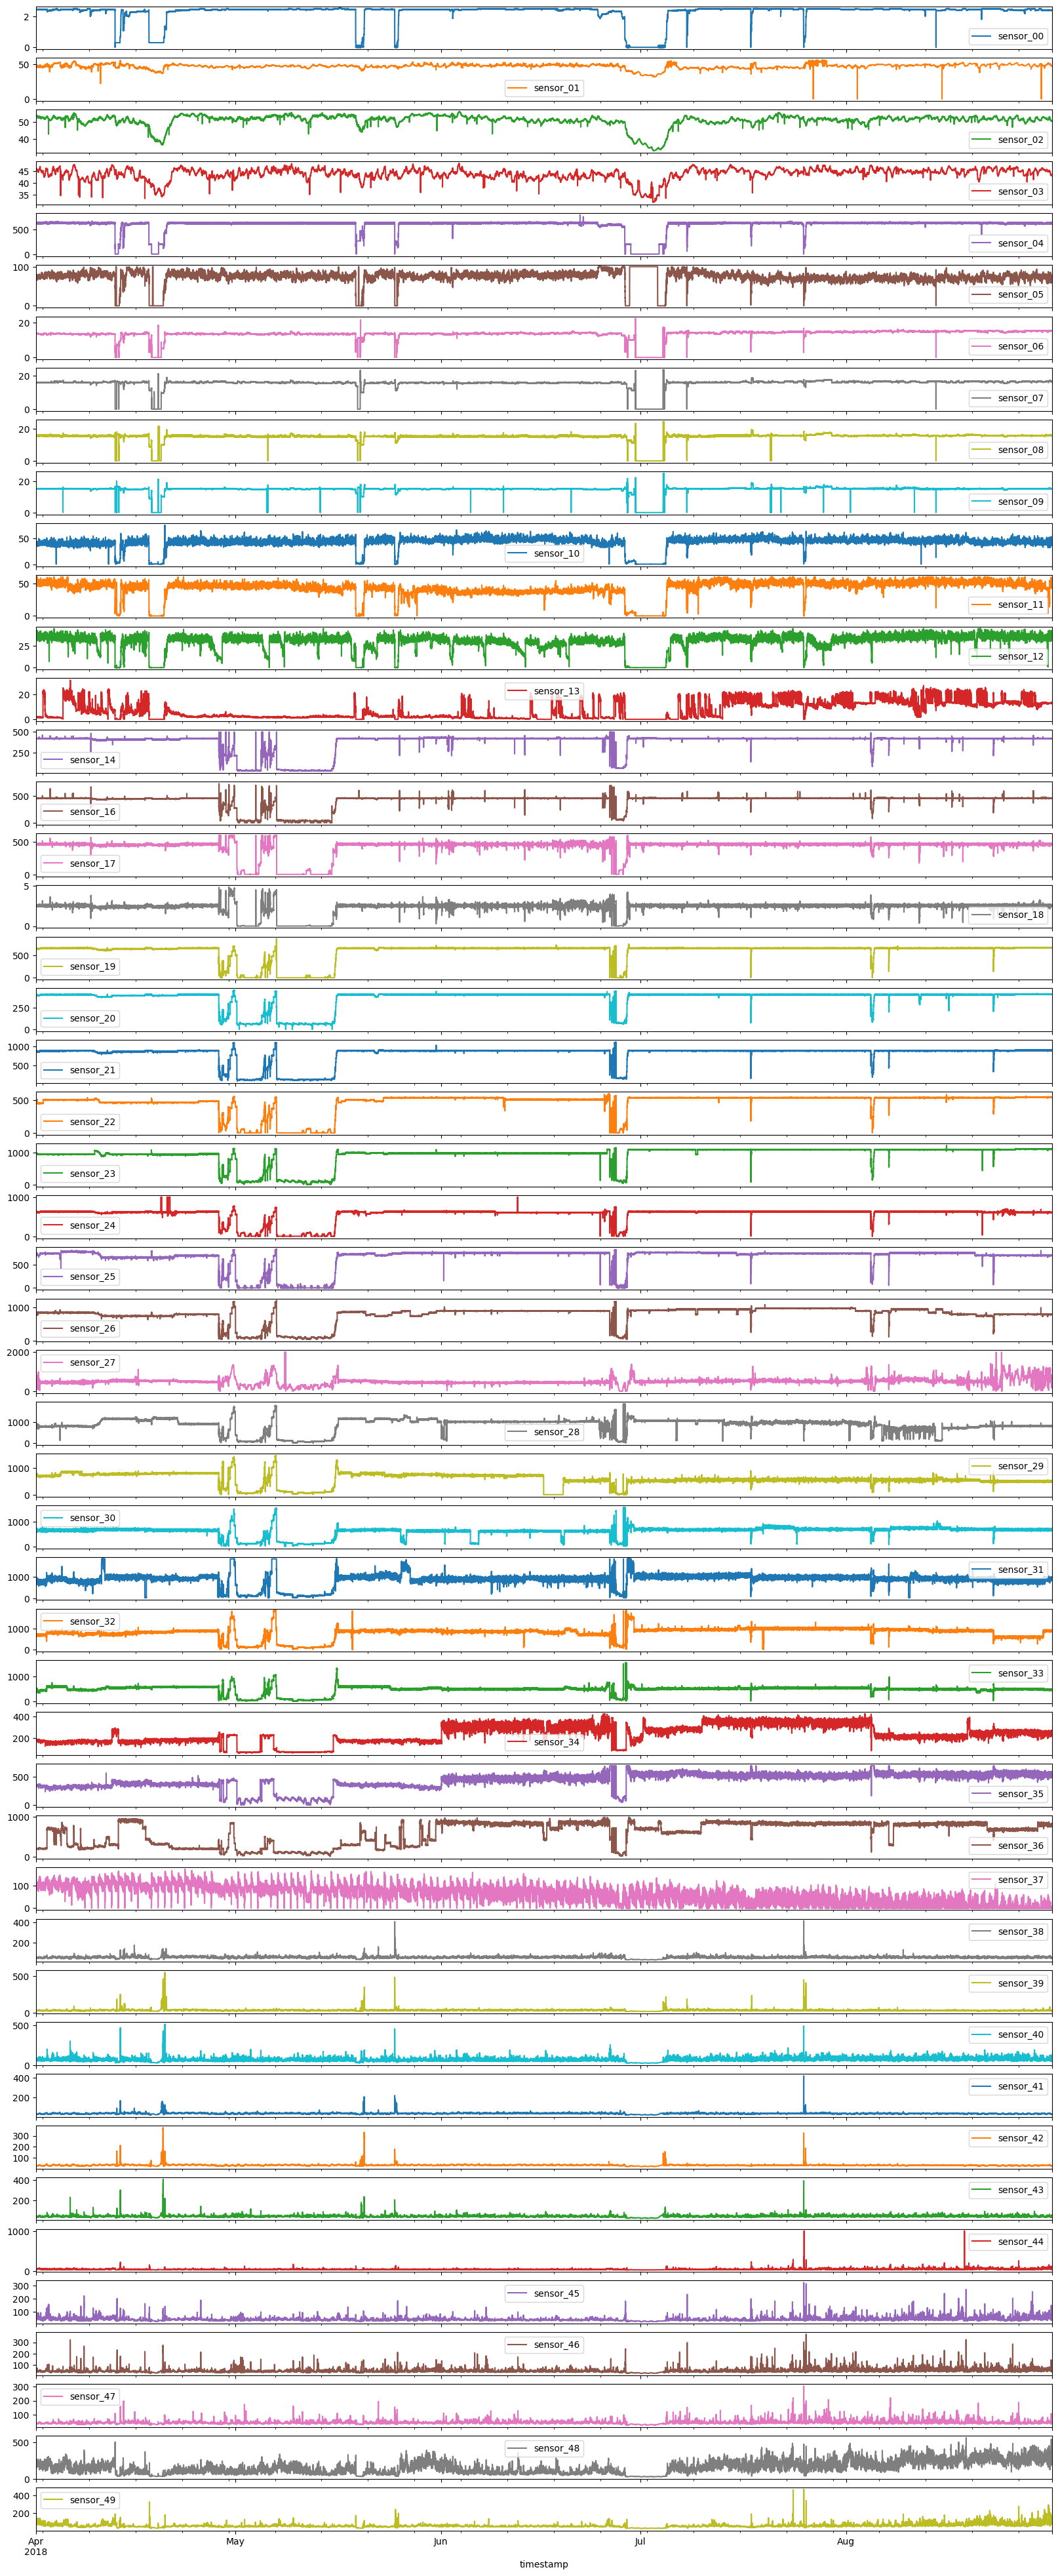

In [20]:
X.plot(subplots =True, sharex = True, figsize = (20,50))

At the end one can normalize or centralize the dataset :


In [21]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

## Anomally Detection Algorithms
In this section, following the study_case_Anomaly_Detection.ipnyb, different Anomaly detection algorithms will be implemented and at the end the results will be compared with the results of this notebook.

In [22]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

outliers_fraction = 1 - (len(normal_rows)/(len(df))) 

anomaly_algorithms = [
    ("Isolation Forest",IsolationForest(contamination=outliers_fraction, n_jobs = -1)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction)),
    ("Local Outlier Factor",LocalOutlierFactor(contamination=outliers_fraction, n_jobs = -1)),
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction))]

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# ## fit the models: Mind you this takes a lot of time!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
for name, algorithm in anomaly_algorithms:
    print(algorithm)

    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(X)
    else:
        y_pred = algorithm.fit(X).predict(X)
    
    df[f'{name}'] = y_pred
    print('-'*100)
    print(f'number of anomolies detected')
    print(df[f'{name}'].value_counts())
    print('-'*100)


IsolationForest(contamination=0.06574074074074077, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
Isolation Forest
 1    205836
-1     14484
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
OneClassSVM(nu=0.06574074074074077)
----------------------------------------------------------------------------------------------------
number of anomolies detected
One-Class SVM
 1    205835
-1     14485
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
LocalOutlierFactor(contamination=0.06574074074074077, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
Local Outlier Factor
 1    205836
-1     14484
Name: count, dtype: int64
-------------------------------------

In [23]:
#save results
filename = 'outcome.csv'
df.to_csv(filename, index=False)

In [16]:
# for name, algorithm in anomaly_algorithms:
#    anomoly_rows = df_results[df_results[f'{name}'] == -1]
#    print(anomoly_rows[['machine_status', f'{name}']])
# df = pd.read_csv('outcome.csv')

                    machine_status  Isolation Forest
timestamp                                           
2018-04-12 22:07:00     RECOVERING                -1
2018-04-12 22:08:00     RECOVERING                -1
2018-04-12 22:09:00     RECOVERING                -1
2018-04-12 22:13:00     RECOVERING                -1
2018-04-12 22:14:00     RECOVERING                -1
...                            ...               ...
2018-08-23 05:32:00         NORMAL                -1
2018-08-23 05:33:00         NORMAL                -1
2018-08-23 05:36:00         NORMAL                -1
2018-08-23 05:37:00         NORMAL                -1
2018-08-23 05:38:00         NORMAL                -1

[14484 rows x 2 columns]
                    machine_status  One-Class SVM
timestamp                                        
2018-04-02 14:04:00         NORMAL             -1
2018-04-02 14:05:00         NORMAL             -1
2018-04-02 14:06:00         NORMAL             -1
2018-04-02 14:07:00         NORMAL 

In [24]:
def plot_sensor_anomolies(sensor, name):
    anomoly_rows = df[df[f'{name}'] == -1]
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering',alpha = 0.5)
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=20, label='broken')
    plot = plt.plot(anomoly_rows[sensor], linestyle='none', marker='X', color='blue', markersize=4, label='anomoly predicted', alpha = 0.1)
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

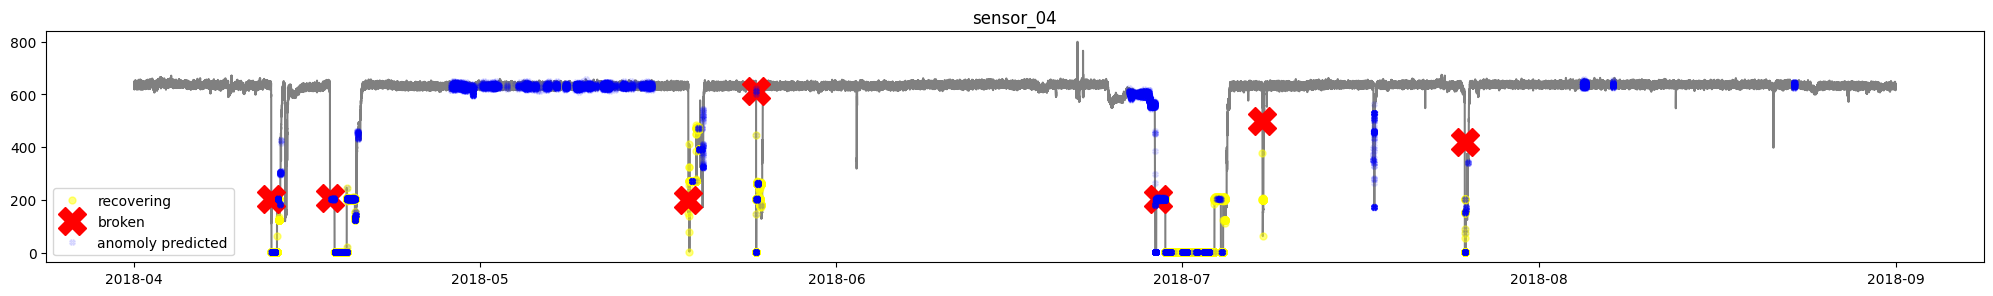

In [25]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')

Although the Isolation forest predicts anomolies near the broken points the outcome is not satisfactory.  